In [1]:
pip install xgboost

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


## Import

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_absolute_error
from xgboost import XGBRegressor

df = pd.read_csv('train.csv',index_col='id')

In [3]:
df

,player_id,friend_count,social_interactions,guild_membership,event_participation_rate,daily_login_streak,avg_session_length,sessions_per_week,total_playtime_hours,days_since_last_login,...,purchase_frequency,payment_methods_used,purchases_on_discount,discount_rate_used,seasonal_spending_pattern,owns_limited_edition,competitive_rank,tournament_participation,segment,spending_30d
id,,,,,,,,,,,,,,,,,,,,,
PLY00001,P007453,140.0,39.0,NaN,35.495321,86.0,94.186687,20.660400,793.043827,6.918242,...,NaN,1.0,1.0,0.250000,4.0,NaN,7.0,1.0,1.0,0.00
PLY00002,P120776,126.0,12.0,1.0,35.222611,27.0,76.694036,15.112974,836.397667,3.514021,...,11.193590,1.0,25.0,0.581395,5.0,0.0,3.0,0.0,1.0,0.00
PLY00003,P083055,157.0,63.0,1.0,54.291374,1.0,66.680997,13.770480,561.212807,1.863368,...,5.175272,3.0,27.0,0.551020,7.0,0.0,5.0,0.0,1.0,0.00
PLY00004,P087827,89.0,96.0,1.0,52.990011,74.0,75.864572,11.941930,NaN,5.973982,...,10.374656,2.0,22.0,0.536585,6.0,0.0,9.0,0.0,2.0,2223.70
PLY00005,P045133,159.0,80.0,0.0,78.586509,84.0,33.774836,1.405901,617.041867,5.570188,...,NaN,3.0,11.0,0.261905,0.0,1.0,4.0,0.0,3.0,156634.22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PLY103996,P019250,81.0,54.0,1.0,67.570582,105.0,36.785310,6.671382,860.003706,7.762639,...,NaN,1.0,3.0,0.428571,1.0,0.0,5.0,0.0,2.0,2566.70
PLY103997,P085802,117.0,62.0,1.0,32.805233,79.0,151.619561,6.211211,173.501198,11.287810,...,7.204170,1.0,6.0,0.260870,NaN,0.0,7.0,0.0,0.0,527.04
PLY103998,P032134,217.0,4.0,1.0,11.347544,73.0,61.428907,7.193119,691.056362,19.752612,...,NaN,2.0,5.0,0.454545,2.0,0.0,8.0,0.0,NaN,0.00


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 104000 entries, PLY00001 to PLY104000
Data columns (total 34 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   player_id                    104000 non-null  object 
 1   friend_count                 97954 non-null   float64
 2   social_interactions          97894 non-null   float64
 3   guild_membership             97972 non-null   float64
 4   event_participation_rate     97999 non-null   float64
 5   daily_login_streak           97893 non-null   float64
 6   avg_session_length           97972 non-null   float64
 7   sessions_per_week            97838 non-null   float64
 8   total_playtime_hours         97868 non-null   float64
 9   days_since_last_login        97960 non-null   float64
 10  achievement_count            97989 non-null   float64
 11  achievement_completion_rate  97939 non-null   float64
 12  historical_spending          97901 non-null   float64

## Prepare Data

In [5]:
df['spending_30d'].isnull().sum()

np.int64(0)

In [6]:
y = df['spending_30d']
X = df.drop(columns=['spending_30d','player_id'])

## Train/Test split

In [7]:
x_train, x_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)

x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=42)

## API + Early Stopping

In [8]:
model = XGBRegressor(
    n_estimators=2000,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    reg_lambda=1,
    reg_alpha=0,
    random_state=42,
    n_jobs=-1
)

model.fit(
    x_train, y_train,
    eval_set=[(x_val, y_val)],
    # early_stopping_rounds=50,
    verbose=2
)

pred_val = model.predict(x_val)
MAE_val  = mean_absolute_error(y_val, pred_val)
print(f'Validation MAE: {MAE_val}')


[0]	validation_0-rmse:28941.11597
[2]	validation_0-rmse:26722.84906
[4]	validation_0-rmse:24807.71354
[6]	validation_0-rmse:23075.89478
[8]	validation_0-rmse:21568.30245
[10]	validation_0-rmse:20236.28183
[12]	validation_0-rmse:19123.60459
[14]	validation_0-rmse:18133.71793
[16]	validation_0-rmse:17275.62082
[18]	validation_0-rmse:16572.14870
[20]	validation_0-rmse:15915.69412
[22]	validation_0-rmse:15354.19385
[24]	validation_0-rmse:14878.66127
[26]	validation_0-rmse:14466.09537
[28]	validation_0-rmse:14107.13047
[30]	validation_0-rmse:13809.45200
[32]	validation_0-rmse:13559.57716
[34]	validation_0-rmse:13349.31039
[36]	validation_0-rmse:13171.68716
[38]	validation_0-rmse:13007.29075
[40]	validation_0-rmse:12899.45125
[42]	validation_0-rmse:12784.52936
[44]	validation_0-rmse:12689.22398
[46]	validation_0-rmse:12621.87954
[48]	validation_0-rmse:12560.09052
[50]	validation_0-rmse:12495.20420
[52]	validation_0-rmse:12447.97931
[54]	validation_0-rmse:12411.73088
[56]	validation_0-rmse:12

## Evaluate on test set

In [9]:
pred_test = model.predict(x_test)
MAE_test  = mean_absolute_error(y_test, pred_test)
print(f'Test MAE: {MAE_test}')

Test MAE: 3175.5931244851445


## Feature Importance

prev_month_spending          0.313660
historical_spending          0.113850
segment                      0.111652
is_premium_member            0.102002
vip_status                   0.053103
games_played                 0.031191
seasonal_spending_pattern    0.023493
days_since_last_purchase     0.020551
purchase_frequency           0.013053
avg_transaction_value        0.012941
dtype: float32


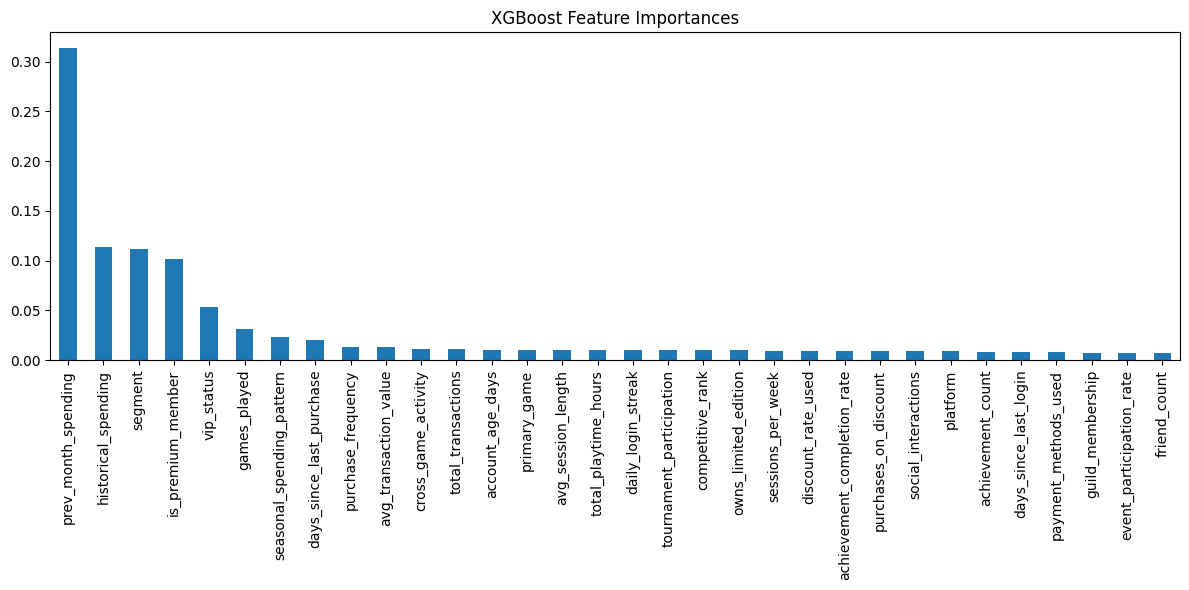

In [10]:
import matplotlib.pyplot as plt
importances = model.feature_importances_
fi = pd.Series(importances, index=X.columns).sort_values(ascending=False)
print(fi.head(10))

fi.plot(kind='bar', figsize=(12,6))
plt.title('XGBoost Feature Importances')
plt.tight_layout()
plt.show()

## Hyperparameter search space

In [11]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import KFold
param_dist = {
    'n_estimators': [300,600,1000, 1500, 2000],
    'learning_rate': [0.01, 0.03, 0.05, 0.1, 0.2],
    'max_depth': [3, 4, 6, 8, 10],
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],
    'reg_lambda': [0, 0.1, 0.5, 1, 2, 10],
    'reg_alpha': [0, 0.1, 0.5, 1, 2, 10],
    'min_child_weight': [1, 3, 5, 7, 10]
}

base = XGBRegressor(random_state=42, n_jobs=-1, tree_method='hist')

cv = KFold(n_splits=5, shuffle=True, random_state=42)

search = RandomizedSearchCV(
    estimator=base,
    param_distributions=param_dist,
    n_iter=25,
    scoring='neg_mean_absolute_error',
    cv=cv,
    verbose=2,
    random_state=42,
    n_jobs=-1
)
search.fit(x_train, y_train)

print("Best parameters found: ", search.best_params_)
best_model = search.best_estimator_

Fitting 5 folds for each of 25 candidates, totalling 125 fits
Best parameters found:  {'subsample': 0.7, 'reg_lambda': 10, 'reg_alpha': 10, 'n_estimators': 2000, 'min_child_weight': 3, 'max_depth': 6, 'learning_rate': 0.01, 'colsample_bytree': 0.8}


## Evaluate on Test Set

In [14]:
pred_test_bestM = best_model.predict(x_test)
MAE_test_bestM  = mean_absolute_error(y_test, pred_test_bestM)
print(f'Test MAE: {MAE_test_bestM}')

Test MAE: 2899.909520854444


## Save Model

In [13]:
import joblib
joblib.dump(best_model, 'task3_xgb_best_model_v1.joblib')
print("Model saved as task3_xgb_best_model_v1.joblib")

Model saved as task3_xgb_best_model_v1.joblib
